<a href="https://colab.research.google.com/github/LucasAb8/IAAA1-DISTANCIA_Oficial/blob/main/TP2_AA1_Regresi%C3%B3n_Correcciones_LucasAbruzzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1

Lucas Abruzzo

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

El dataset elegido es: Seoul Bike Sharing Demand  
El link del Dataset es https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
Cuenta con 13 variables y un target:

*   Date: Date
*   Rented Bike Count: Int
*   Hour: Int
*   Temperature: Float (Contínuo)
*   Humidity: Int
*   Wind speed: Float (Contínuo)
*   Visibility: Int
*   Dew point temperature: Float (Contínuo)
*   Solar Radiation: Float (Contínuo)
*   Rainfall: Int
*   Snowfall: int
*   Seasons: categórico
*   Holiday	: Binario
*   Functioning Day: Binario


El dataset propone utilizar "Functioning Day" como target, pero debido a la naturaleza de regresión lineal de la consigna y a las posibilidades de análisis, decidí utilizar "Rented Bike Count" como target y poder analizar la cantidad de bicicletas necesarias por hora dados los datos que los features aportan.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Detección de Outliers
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#Heatmap
from matplotlib.colors import LinearSegmentedColormap

#Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.inspection import permutation_importance


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

#Carga del Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"  #Url donde se encuentra el dataset
df_bikes = pd.read_csv(url, encoding="ISO-8859-1")  #carga del dataset
df_bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Información general sobre el conjunto de datos

In [ ]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Descripción estadística

In [ ]:
df_bikes.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#Valores Nulos
La información de la página del dataset asegura que no existen valores nulos. Sin embargo, una buena práctica es revisar esto igualmente para evitar problemas futuros

In [ ]:
df_bikes.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


#Outliers
Para analizar los outliers no se tiene en cuenta los campos binarios (ya que no tiene sentido), las horas ni las variables categóricas

In [ ]:
# Isolation Forest
# Seleccionamos solo columnas numéricas para el modelo
exclude = ['Date','Holiday','Functioning Day','Hour','Seasons']
columns = [col for col in df_bikes.columns if col not in exclude]

X_number = df_bikes[columns].copy()

# Aplicamos imputación para manejar valores faltantes
X_number_imputed = SimpleImputer(strategy='mean').fit_transform(X_number)

# Entrenamos el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_number_imputed)

# -1 para outliers, 1 para inliers
df_outliers = df_bikes.copy()
df_outliers['outlier'] = outliers

print(f"Número de outliers detectados por Isolation Forest: {sum(outliers == -1)}")
print(f"Porcentaje de outliers: {sum(outliers == -1) / len(outliers) * 100:.2f}%")


Número de outliers detectados por Isolation Forest: 438
Porcentaje de outliers: 5.00%


#Distribuciones

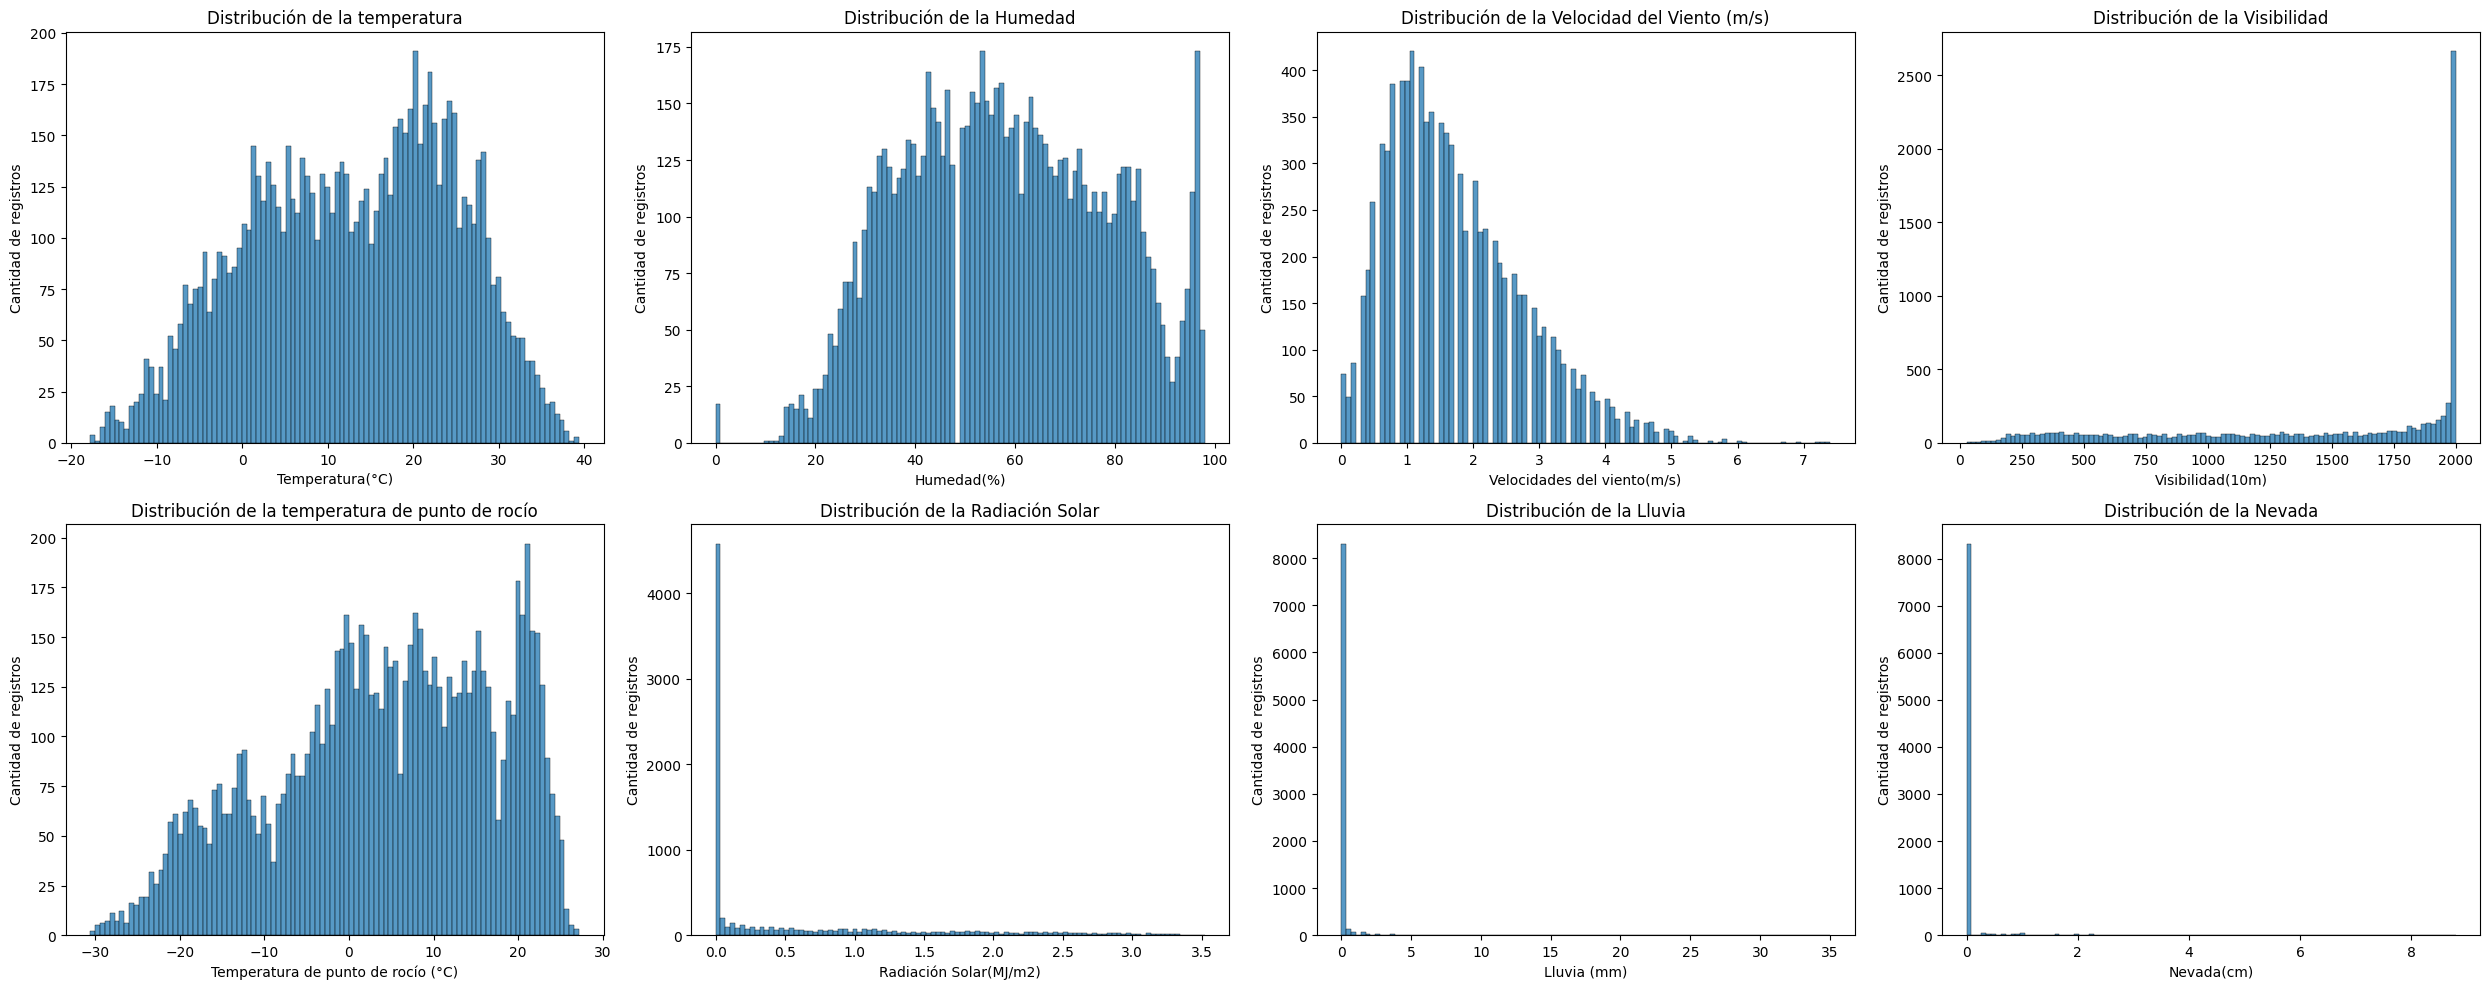

In [ ]:
# Visualizamos la distribución de algunas variables categóricas
plt.figure(figsize=(25, 10))

#Temperatura
plt.subplot(2, 4, 1)
sns.histplot(df_bikes['Temperature(°C)'], bins=100, kde=False)  # bins = número de rangos
plt.title("Distribución de la temperatura")
plt.xlabel("Temperatura(°C)")
plt.ylabel("Cantidad de registros")

#Humedad
plt.subplot(2, 4, 2)
sns.histplot(df_bikes['Humidity(%)'], bins=100, kde=False)
plt.title("Distribución de la Humedad")
plt.xlabel("Humedad(%)")
plt.ylabel("Cantidad de registros")

#Velocidad viento
plt.subplot(2, 4, 3)
sns.histplot(df_bikes['Wind speed (m/s)'], bins=100, kde=False)
plt.title("Distribución de la Velocidad del Viento (m/s)")
plt.xlabel("Velocidades del viento(m/s)")
plt.ylabel("Cantidad de registros")


#visibilidad
plt.subplot(2, 4, 4)
sns.histplot(df_bikes['Visibility (10m)'], bins=100, kde=False)
plt.title("Distribución de la Visibilidad")
plt.xlabel("Visibilidad(10m)")
plt.ylabel("Cantidad de registros")

#Temperatura de rocío
plt.subplot(2, 4, 5)
sns.histplot(df_bikes['Dew point temperature(°C)'], bins=100, kde=False)
plt.title("Distribución de la temperatura de punto de rocío")
plt.xlabel("Temperatura de punto de rocío (°C)")
plt.ylabel("Cantidad de registros")


#Radiación Solar
plt.subplot(2, 4, 6)
sns.histplot(df_bikes['Solar Radiation (MJ/m2)'], bins=100, kde=False)
plt.title("Distribución de la Radiación Solar")
plt.xlabel("Radiación Solar(MJ/m2)")
plt.ylabel("Cantidad de registros")

#Lluvia
plt.subplot(2, 4, 7)
sns.histplot(df_bikes['Rainfall(mm)'], bins=100, kde=False)
plt.title("Distribución de la Lluvia")
plt.xlabel("Lluvia (mm)")
plt.ylabel("Cantidad de registros")

#Nevada
plt.subplot(2, 4, 8)
sns.histplot(df_bikes['Snowfall (cm)'], bins=100, kde=False)
plt.title("Distribución de la Nevada")
plt.xlabel("Nevada(cm)")
plt.ylabel("Cantidad de registros")

plt.tight_layout()
plt.show()


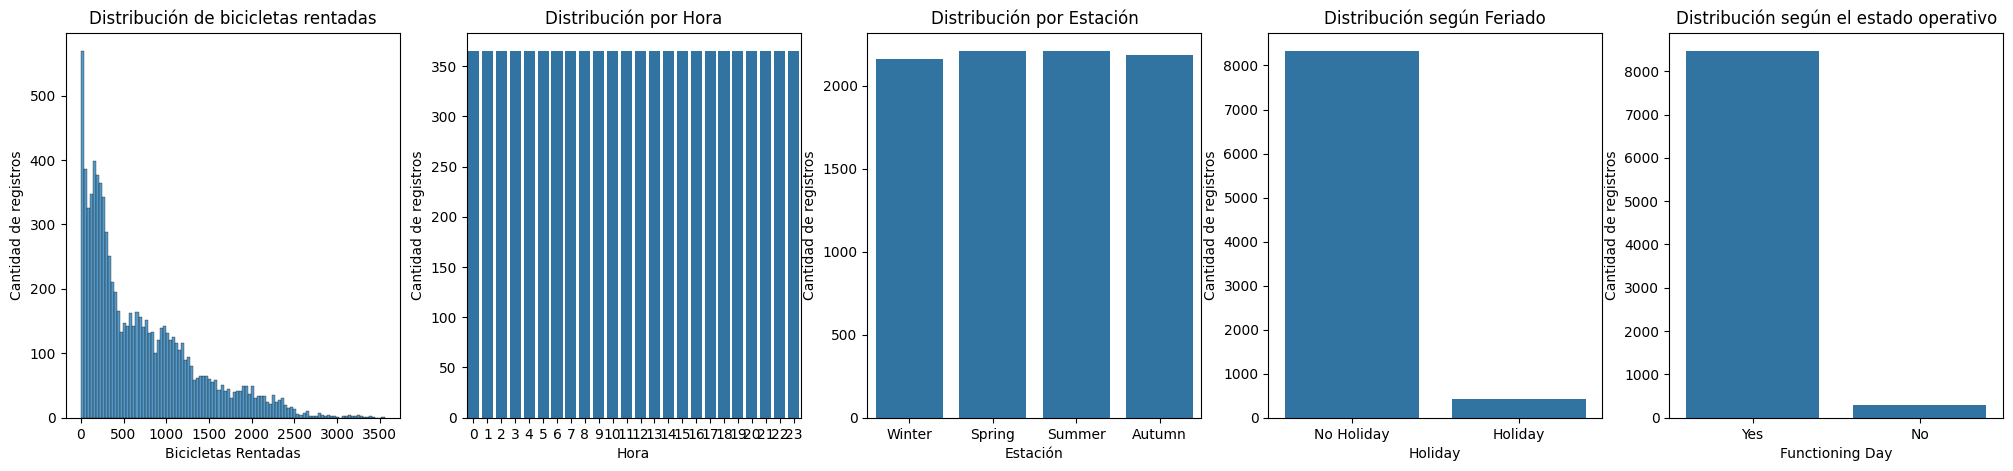

In [ ]:
plt.figure(figsize=(25, 5))

#Distribución de bicicletas rentadas
plt.subplot(1, 5, 1)
sns.histplot(df_bikes['Rented Bike Count'], bins=100, kde=False)  # bins = número de rangos
plt.title("Distribución de bicicletas rentadas")
plt.xlabel("Bicicletas Rentadas")
plt.ylabel("Cantidad de registros")

#Distribución de horas: este gráfico podría verse inicialmente trivial...pero poder analizarlo es de gran utilidad para verificar que no solo responden a una etsructura cíclica
#sino que, además, hay igual cantidad de registros para cada hora (lo cual hace mas consistente y enriquecedor el proyecto en general)
plt.subplot(1, 5, 2)
sns.countplot(x='Hour', data=df_bikes)
plt.title("Distribución por Hora")
plt.xlabel("Hora")
plt.ylabel("Cantidad de registros")

#Estaciones
plt.subplot(1, 5, 3)
sns.countplot(x='Seasons', data=df_bikes)
plt.title("Distribución por Estación")
plt.xlabel("Estación")
plt.ylabel("Cantidad de registros")

#Feriados
plt.subplot(1, 5, 4)
sns.countplot(x='Holiday', data=df_bikes)
plt.title("Distribución según Feriado")
plt.ylabel("Cantidad de registros")

#Estado operativo
plt.subplot(1, 5, 5)
sns.countplot(x='Functioning Day', data=df_bikes)
plt.title("Distribución según el estado operativo")
plt.ylabel("Cantidad de registros")

plt.show()

#Relaciones features-target

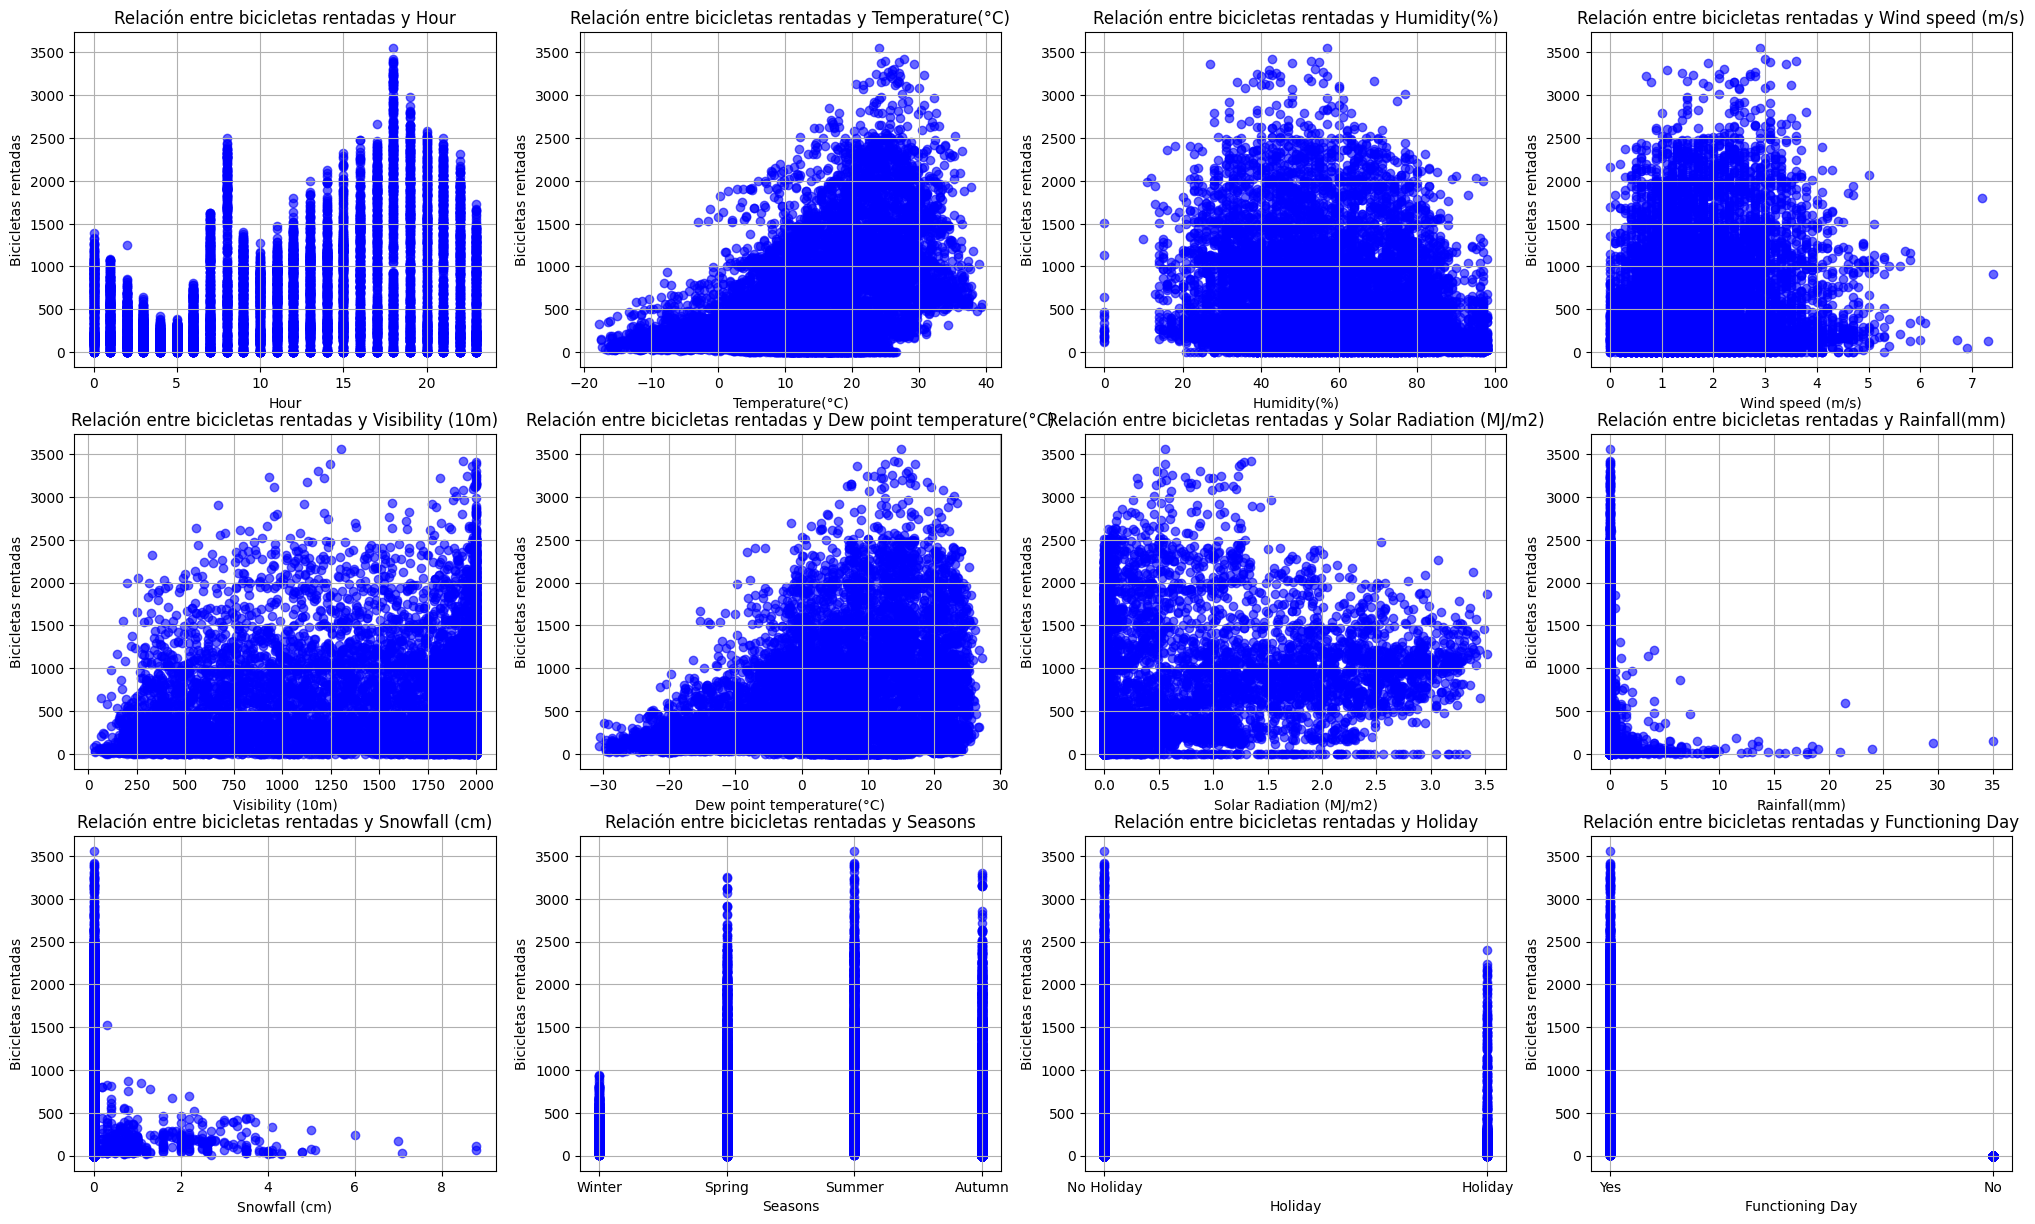

In [ ]:
column_names = [col for col in df_bikes.columns if col != "Rented Bike Count" and col!= "Date"]
plt.figure(figsize=(25, 20))

# Variables
y = df_bikes['Rented Bike Count']

for i in column_names:
  plt.subplot(4, 4, column_names.index(i)+1)
  if i == "Date":
    plt.scatter(df_bikes['Date'], df_bikes['Rented Bike Count'], s=10, alpha=0.5)
  else:
    plt.scatter(df_bikes[i],  y, color='blue', alpha=0.6)
  plt.title(f"Relación entre bicicletas rentadas y {i}")
  plt.ylabel("Bicicletas rentadas")
  plt.xlabel(i)
  plt.grid(True)
plt.show()

#📈 Relaciones Lineales
Las relaciones lineales más fuertes (y por consecuencia, más útiles para la regresión lineal) son:

##🟢 Relación bicicletas rentadas - temperatura:
Podemos ver que hay una tendencia en aumento a medida que la temperatura se acerca a los 25 grados aproximadamente (clima templado), que suele ser ideal para las actividades al aire libre o circular por la calle. Esto se contrapone con las temperaturas más elevadas (hacia los 40 grados) o más bajas (bajo 0 grados), donde la renta de bicicletas es reducida.

##🟢 Relación bicicletas rentadas - visibilidad:
Mientras mayor es la visibilidad, más bicicletas son rentadas. Esto tiene sentido ya que, para andar en bicicleta, factores como la niebla pueden ser peligrosos.

##🟢 Relación bicicletas rentadas - temperatura de punto de rocío:
El punto de rocío es una medida absoluta de cuánta humedad contiene el aire. Existe una relación en la que, a medida que el punto de rocío sube, aumenta la cantidad de bicicletas rentadas, pero decrece luego de los 15 grados (el aire se siente demasiado húmedo).

##🟢 Relación bicicletas rentadas - lluvia:
No es lineal, se acerca más a una función exponencial con exponente negativo. Pero podría replantearse como una variable categórica binaria (llueve o no llueve) usando One-Hot Encoding.

##🟢 Relación bicicletas rentadas - nevada:
Caso similar al de la lluvia.

##🟢 Relación bicicletas rentadas - Holiday:
Existe una relación directa que puede aportar mucha información si se hace One-Hot Encoding o se le asignan valores (ej.: 0 y 1).

##⚠️ Relación bicicletas rentadas - hora (opcional):
00:00 - 05:00: decrecimiento (la gente duerme)
05:00 - 08:00: crecimiento fuerte (salida al trabajo/estudio)
10:00 - 17:00: crecimiento paulatino
17:00 - 18:00: crecimiento abrupto (hora de salida laboral)
18:00 - 24:00: decrecimiento (la gente llega a casa)


#Heatmap

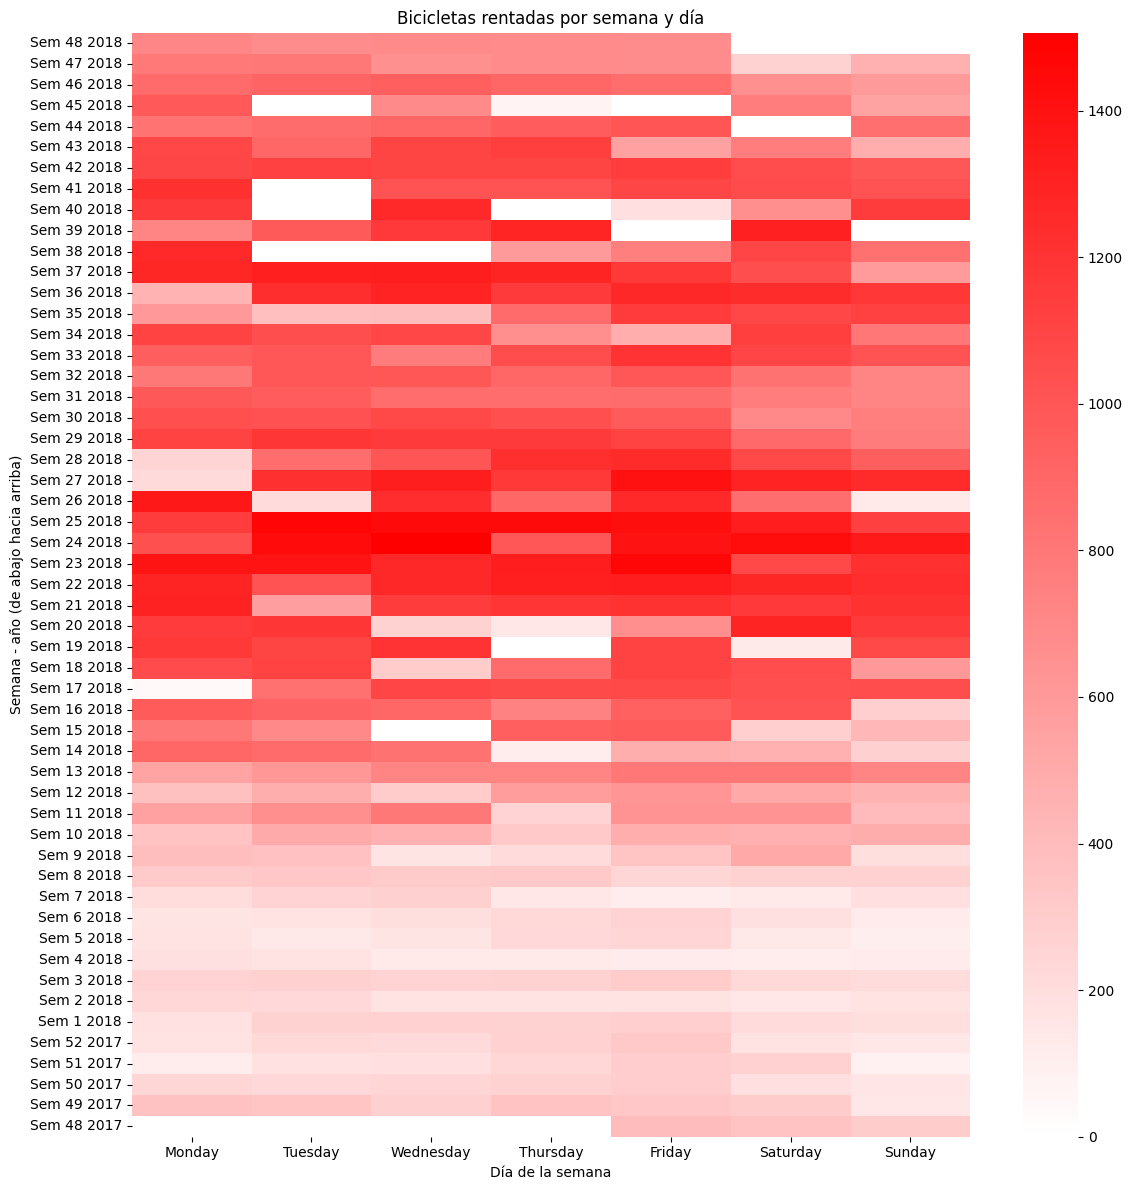

In [ ]:

df_bikes_hm = df_bikes.copy(deep=True)

#Formateo de la fecha
df_bikes_hm['Date'] = pd.to_datetime(df_bikes_hm['Date'], dayfirst=True)

#Columnas necesarias para contruir la columna que se necesita para el heatmap
df_bikes_hm['day_of_week'] = df_bikes_hm['Date'].dt.day_name()           #Columna con los nombres de los días en ingles



#Semana y año ISO
df_bikes_hm['iso_year'] = df_bikes_hm['Date'].dt.isocalendar().year
df_bikes_hm['iso_week'] = df_bikes_hm['Date'].dt.isocalendar().week

# Columna final con el formato pedido
df_bikes_hm['semana_mes'] = (
    "Sem " + df_bikes_hm['iso_week'].astype(str) + " " + df_bikes_hm['iso_year'].astype(str)
)

# Agrupar por semana y día
df_pivot = (
    df_bikes_hm.groupby(['semana_mes', 'day_of_week'])['Rented Bike Count']
    .mean()
    .reset_index()
)

# Pivotear para formato heatmap
heatmap_data = df_pivot.pivot(index='semana_mes', columns='day_of_week', values='Rented Bike Count')

# Ordenar días de la semana
dias_orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(columns=dias_orden)

# Reordenar semanas cronológicamente
orden_semanas = (
    df_bikes_hm.groupby('semana_mes')['Date']
    .min()
    .sort_values()
    .index
)
heatmap_data = heatmap_data.reindex(orden_semanas)

# Rellenar valores faltantes
heatmap_data = heatmap_data.fillna(0)

# Invertir el orden del eje Y
heatmap_data = heatmap_data[::-1]

# Paleta de blanco a rojo
blanco_a_rojo = LinearSegmentedColormap.from_list("blanco_rojo", ["#ffffff", "#ff0000"])

# Graficar heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    heatmap_data,
    cmap=blanco_a_rojo,
    annot=False,
    fmt="g",
    yticklabels=heatmap_data.index  # etiquetas invertidas
)

plt.title("Bicicletas rentadas por semana y día")
plt.xlabel("Día de la semana")
plt.ylabel("Semana - año (de abajo hacia arriba)")
plt.tight_layout()
plt.show()




#Relación bicicletas rentadas - Fecha
Para poder encontrar relaciones, opté por hacer un heatmap. En la visualización se puede ver que hay períodos del año donde, por ejemplo, se rentan menos bicicletas (diciembre-febrero, que coincide con el invierno) o que, en viernes, sábado y domingo, se notan valores ligeramente más altos en la cantidad de bicicletas rentadas. Sin embargo, no existe relación lineal, por lo cual podría ser conflictivo para la regresión lineal.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

#Missing Values
No contiene, por lo que no es necesario trabajarlos


#Outliers

Número de outliers en 'Rented Bike Count': 158
Límite inferior: -1120.38
Límite superior: 2376.62


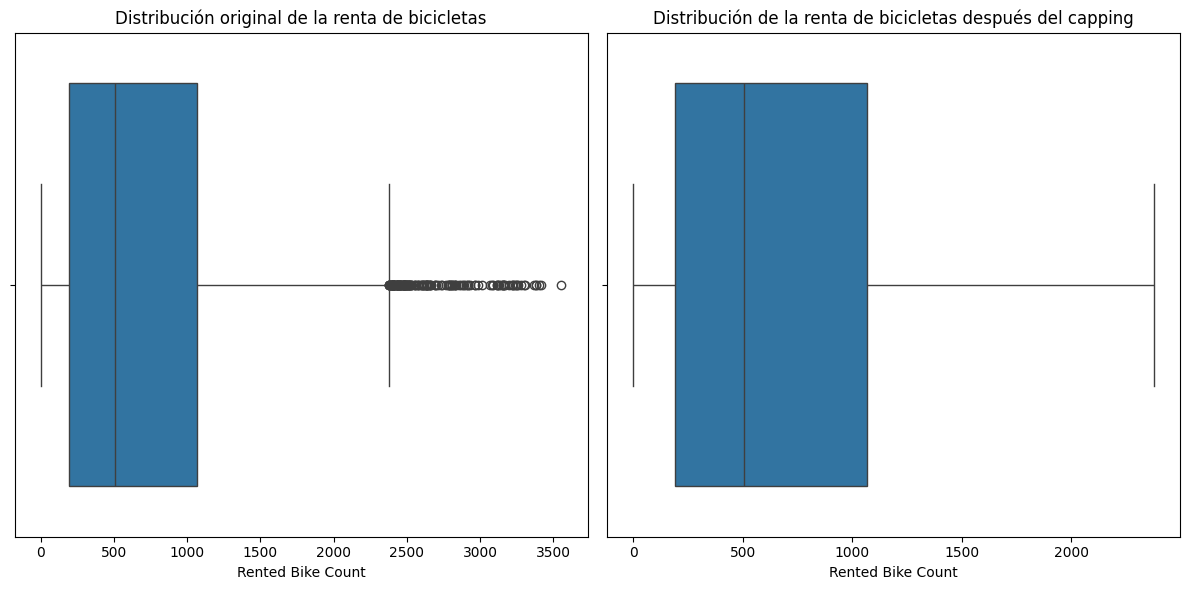

In [ ]:


# Detección usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectamos outliers en la columna 'Rented Bike Count'
outliers_rbc, lower_bound, upper_bound = detect_outliers_iqr(df_bikes, 'Rented Bike Count')

print(f"Número de outliers en 'Rented Bike Count': {len(outliers_rbc)}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

df_capped = df_bikes.copy()
df_capped['Rented Bike Count'] = df_capped['Rented Bike Count'].clip(lower=lower_bound, upper=upper_bound)


# Visualizamos la distribución después del capping
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_bikes['Rented Bike Count'])
plt.title("Distribución original de la renta de bicicletas")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Rented Bike Count'])
plt.title("Distribución de la renta de bicicletas después del capping")

plt.tight_layout()
plt.show()

#Features descartadas
🔴Hour: esta feature  fue considerada como opcional porque puede ser útil y tiene cierta relación con lo que sucede en la realidad, pero no es esencialmente lineal, sino que la linealidad puede extraerse segmentando del dominio, complejizando el caso de estudio

🔴Humidity: no es lineal, tiene mucha dispersión y forma de campana.

🔴Wind speed:  a pesar de que tiene cierta tendencia negativa, posee mucha dipsersión.

🔴Solar Radiation: tiene una tendencia negativa, pero a partir de 1.5 se "estabiliza" lo cual podría afectar al modelo o agregar datos poco correlacionados.

🔴Seasons: este feature puede ser útil para analizar contextos, pero como ya existen muchos otros features mas específicos, usar seasons no solo sería en cierto punto, redundante, sino que podría aportar ruido.

🔴Functioning Day: No es muy útil, ya que esta variable refiere a si están disponibles o no las bicicletas.

In [ ]:
df_bikes_dropped = df_bikes.drop(columns=["Hour", "Humidity(%)", "Wind speed (m/s)","Solar Radiation (MJ/m2)","Seasons", "Functioning Day","Date"])
df_bikes_dropped.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Holiday
0,254,-5.2,2000,-17.6,0.0,0.0,No Holiday
1,204,-5.5,2000,-17.6,0.0,0.0,No Holiday
2,173,-6.0,2000,-17.7,0.0,0.0,No Holiday
3,107,-6.2,2000,-17.6,0.0,0.0,No Holiday
4,78,-6.0,2000,-18.6,0.0,0.0,No Holiday


#Variables categóricas
La variable categórica que se van a utilizar es:

🟢 Holiday (categórica binaria)


#Importante:

🟢 Rainfall y snowfall aportan información tan relevante que para compensar la no linealidad, se van a reestructurar para 2 categorías cada una: Llueve(1)/No Llueve(0) y Nieva(1)/No Nieva(0)


In [ ]:
#Se utiliza umbrales para crear columnas binarias para Snowfall y Rainfall
df_bikes_binary = df_bikes_dropped.copy()
df_bikes_binary["Snowfall_binary"] = (df_bikes_binary["Rainfall(mm)"] > 1).astype(int)
df_bikes_binary["Rainfall_binary"] = (df_bikes_binary["Snowfall (cm)"] >= 0.1).astype(int)


In [ ]:

#Como no existe un orden inherente entre Holiday y No Holiday, se decide usar one-hot Encoding
df_bikes_onehot = df_bikes_binary.copy()

# One-Hot Encoding para 'Holiday'
df_bikes_onehot = pd.get_dummies(df_bikes_onehot, columns=['Holiday'], drop_first=True)
df_bikes_onehot.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Snowfall_binary,Rainfall_binary,Holiday_No Holiday
0,254,-5.2,2000,-17.6,0.0,0.0,0,0,True
1,204,-5.5,2000,-17.6,0.0,0.0,0,0,True
2,173,-6.0,2000,-17.7,0.0,0.0,0,0,True
3,107,-6.2,2000,-17.6,0.0,0.0,0,0,True
4,78,-6.0,2000,-18.6,0.0,0.0,0,0,True


In [ ]:
df_bikes_clean = df_bikes_onehot.drop(columns=["Rainfall(mm)","Snowfall (cm)"])
df_bikes_clean.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Snowfall_binary,Rainfall_binary,Holiday_No Holiday
0,254,-5.2,2000,-17.6,0,0,True
1,204,-5.5,2000,-17.6,0,0,True
2,173,-6.0,2000,-17.7,0,0,True
3,107,-6.2,2000,-17.6,0,0,True
4,78,-6.0,2000,-18.6,0,0,True


#Escalado
Centra los datos en una media de 0 y una desviación estándar de 1.

In [ ]:
#Aplicamos StandardScaler
df_standard = df_bikes_clean.copy()
scaler = StandardScaler()

#Separamos objetivo y predictores
X = df_standard.drop('Rented Bike Count', axis=1)
y = df_standard['Rented Bike Count']

#Escalado
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la estandarización:")
print(X_scaled_df.describe().round(2))

Estadísticas descriptivas después de la estandarización:
       Temperature(°C)  Visibility (10m)  Dew point temperature(°C)  \
count          8760.00           8760.00                    8760.00   
mean              0.00             -0.00                      -0.00   
std               1.00              1.00                       1.00   
min              -2.57             -2.32                      -2.66   
25%              -0.79             -0.82                      -0.67   
50%               0.07              0.43                       0.08   
75%               0.81              0.93                       0.82   
max               2.22              0.93                       1.77   

       Snowfall_binary  Rainfall_binary  Holiday_No Holiday  
count          8760.00          8760.00             8760.00  
mean              0.00            -0.00                0.00  
std               1.00             1.00                1.00  
min              -0.17            -0.23               -

#División Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)   #20% para test y 80% para entrenamiento





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


#Modelo de regresión lineal

In [ ]:

#Creación del modelo de regresión lineal
reg_model = linear_model.LinearRegression()

#Entrenamiento del modelo
reg_model.fit(X_train, y_train)

#Predicciones a partir del conjunto de testeo y entrenamiento
y_test_pred = reg_model.predict(X_test)
y_train_pred = reg_model.predict(X_train)

In [ ]:
#Coeficientes
print("Coefficients: \n", reg_model.coef_)


#Métricas en el entrenamiento
train_mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
print("==========CONJUNTO DE ENTRENAMIENTO============")
print("Coeficiente de determinación: %.2f" % train_r2 )
print("Coeficiente MSE: %.2f" % train_mse )
print("Coeficiente MAE: %.2f" % train_mae )
print("Coeficiente RMSE: %.2f" % train_rmse )


test_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("==========CONJUNTO DE TEST============")
print("Coeficiente de determinación: %.2f" % test_r2 )
print("Coeficiente MSE: %.2f" % test_mse )
print("Coeficiente MAE: %.2f" % test_mae )
print("Coeficiente RMSE: %.2f" % test_rmse )


Coefficients: 
 [ 669.49088779   28.95447523 -348.7826254   -75.4188167    13.17052979
   35.8995521 ]
==========CONJUNTO DE ENTRENAMIENTO============
Coeficiente de determinación: 0.38
Coeficiente MSE: 257707.71
Coeficiente MAE: 367.98
Coeficiente RMSE: 507.65
==========CONJUNTO DE TEST============
Coeficiente de determinación: 0.40
Coeficiente MSE: 250173.00
Coeficiente MAE: 362.85
Coeficiente RMSE: 500.17



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



#Análisis coeficientes (escalados):


*   Temperature(°C): 669.49088779 y signo positivo(Relación positiva). Tiene un impacto relevante.
*   Visibility (10m): 28.95447523 y signo positivo (Relación positiva). Su impacto no es tan relevante.
*   Dew point temperature(°C):-348.7826254 y signo negativo(Relación negativa). Tiene un gran impacto.
*   Snowfall_binary: -75.4188167  y signo negativo(relación negativa). Tiene un impacto moderado
*   Rainfall_binary:  13.17052979 y signo positivo (relación positiva). Su impacto no es tan relevante.
*   Holiday_No Holiday: 35.8995521 y signo positivo (Relación positiva). Su impacto no es tan relevante.





## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



Dentro de las variables elegidas inicialmente, las mas importantes según el modelo son la Temperature(°C), Dew point temperature(°C) y Snowfall. Sin embargo, hay algunos aspectos en los que no coincide del todo con el análisis exploratorio:



* Dew point temperature(°C) según la gráfica de correlación, la tendencia es positiva (crecimiento). Sin embargo, dado que las variables trabajan complementándose, esperar resultados en un contexto local, puede ser poco relevante.

* Visibility (10m), según el EDA tiene una fuerte correlación, cosa que no se ve reflejada en el coeficiente del modelo.

* Rainfall tiene una gráfica "similar" a la de snowfall, pero el coeficiente no refleja el mismo impacto (o similar)

* Aquellas variables que fueron convertidas a binario  tienen coeficientes más bajos de lo que se podría esperar viendo el EDA. Pero esto puede verse afectado por posibles limitaciones del modelo de regresión lineal o la correlación de otras variables, en el funcionamiento complementario de todas ellas.


Por otro lado R² tiene un valor bajo (0.40) y un MSE alto(Mal rendimiento). Esto puede deberse a distintos factores:


*   Hay relaciones no lineales. Si bien fueron elegidas las relaciones que más se acercaban a la linealidad, no eran completamente lineales o existía mucha dispersion
*  Multicolinealidad: algunas variables tienen alguna correlación entre si, debilitando el efecto aparente de cada una.
*  Variables predictoras insuficientes o irrelevantes


A pesar de todo eso, el hecho de que existan coeficientes similares entre el conjunto de testeo y de entrenamiento, implica que el modelo generaliza bastante bien.







## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [ ]:

feature_names = ["Temperature(°C)","Visibility (10m)","Dew point temperature(°C)","Snowfall_binary","Rainfall_binary","Holiday_No Holiday"]

#Entrenamiento modelo original
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

#Importancia por permutación
r = permutation_importance(reg_model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

#Importancias
for i in r.importances_mean.argsort()[::-1]:
      print(f"{feature_names[i]:<8} "
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")




Temperature(°C) 2.250 +/- 0.073
Dew point temperature(°C) 0.614 +/- 0.021
Snowfall_binary 0.034 +/- 0.005
Holiday_No Holiday 0.005 +/- 0.002
Visibility (10m) 0.004 +/- 0.001
Rainfall_binary 0.000 +/- 0.001


In [ ]:
selected_features = ["Temperature(°C)","Dew point temperature(°C)"]

#Convertir en dataframes
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test  = pd.DataFrame(X_test,  columns=feature_names)

X_train_selected = X_train[selected_features]
X_test_selected  = X_test[selected_features]


#Nuevo modelo
reg_model_new = LinearRegression()

# Entrenamos con las variables seleccionadas
reg_model_new.fit(X_train_selected, y_train)
r2_train = reg_model_new.score(X_train_selected, y_train)
r2_test  = reg_model_new.score(X_test_selected, y_test)

print(f"R² Train: {r2_train:.3f}")
print(f"R² Test : {r2_test:.3f}")

R² Train: 0.361
R² Test : 0.379



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


#TP2: REGRESIÓN

In [ ]:
#Librerías
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_absolute_percentage_error


#Escalado

In [ ]:
#Aplicamos StandardScaler
df_mlp = df_standard.copy()
scaler = StandardScaler()

#Separamos objetivo y predictores
X_mlp = df_mlp.drop('Rented Bike Count', axis=1)
y_mlp = df_mlp['Rented Bike Count']

#Escalado
X_mlp_scaled = scaler.fit_transform(X_mlp )
X__mlp_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la estandarización:")
print(X__mlp_scaled_df.describe().round(2))



Estadísticas descriptivas después de la estandarización:
       Temperature(°C)  Visibility (10m)  Dew point temperature(°C)  \
count          8760.00           8760.00                    8760.00   
mean              0.00             -0.00                      -0.00   
std               1.00              1.00                       1.00   
min              -2.57             -2.32                      -2.66   
25%              -0.79             -0.82                      -0.67   
50%               0.07              0.43                       0.08   
75%               0.81              0.93                       0.82   
max               2.22              0.93                       1.77   

       Snowfall_binary  Rainfall_binary  Holiday_No Holiday  
count          8760.00          8760.00             8760.00  
mean              0.00            -0.00                0.00  
std               1.00             1.00                1.00  
min              -0.17            -0.23               -

In [ ]:
#División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#Función para construir modelo


In [ ]:
#La función permite pasar hiperparámetros
def build_and_evaluate_mlp(X_train, X_test, y_train, y_test,
                           hidden_layers,
                           learning_rate=0.001, epochs=100, batch_size=32,alpha_value = 0.001,verbose = False):

    #Modelo
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        learning_rate_init=learning_rate,
        max_iter=epochs,
        batch_size=batch_size,
        random_state=42,
        alpha=alpha_value,
        early_stopping=False,
        verbose = verbose
    )

    #Entrenamiento
    model.fit(X_train, y_train)

    #Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Métricas/errores
    def evaluar(y_true, y_pred, nombre):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"\n📊 Resultados para {nombre}:")
        print(f"   MSE  = {mse:.4f}")
        print(f"   RMSE = {rmse:.4f}")
        print(f"   MAE  = {mae:.4f}")
        print(f"   MAPE = {mape*100:.2f}%")
        print(f"   R²   = {r2:.4f}")
        return {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE": mape, "R2": r2}

    #Evaluaciones
    resultados_train = evaluar(y_train, y_train_pred, "Entrenamiento")
    resultados_test = evaluar(y_test, y_test_pred, "Test")
    return model, resultados_train, resultados_test, y_test_pred, y_train_pred



#Fuente
#La implementación es una mezcla entre la estructura propuesta en la documentación de la clase (neural-networks-introduction.ipynb) dentro de una función y el prompt: "Agregar una función para imprimir y devolver varios errores/métricas". Si bien los mas importantes en este caso
#son el R cuadrado y el MSE, no quería olvidarme de ningún otro.

#Punto de partida
Si bien no es una ley universal, existe una hipótesis que dice que un modelo complejo tiende al sobreajuste y, por el contrario, un modelo simple, al subajuste. Esto puede regularse a partir de la combinación de los hiperparámetros. Aquellos que influyen de manera más directa en el ajuste son la cantidad de capas y neuronas.

Para analizar el ajuste, se tomará el MSE, que penaliza errores grandes y representa la diferencia al cuadrado promedio entre el valor real y la predicción.

#Underfitting
Siguiendo la hipótesis, la cantidad más baja de capas posible es 1 y, en cuanto a la cantidad de neuronas, se decidió utilizar un número bajo: 8. A lo largo de los demás modelos se buscará mantener constantes el resto de los hiperparámetros para que la comparación sea más justa.

In [ ]:
#Creación del modelo con 1 capa y 8 neuronas. Además se inicializan alguna variables que luego se van a utilizar
model_under, under_train_error, under_test_error,under_y_test_pred,under_y_train_pred = build_and_evaluate_mlp(
        X_train, X_test, y_train, y_test,
        hidden_layers = (8,),
        verbose=True,
        )


Iteration 1, loss = 456776.17191907
Iteration 2, loss = 456072.39193964
Iteration 3, loss = 454976.10560544
Iteration 4, loss = 452309.02804458
Iteration 5, loss = 447303.11668681
Iteration 6, loss = 440000.63987325
Iteration 7, loss = 431310.23695228
Iteration 8, loss = 421577.64947558
Iteration 9, loss = 410998.93003288
Iteration 10, loss = 399654.29794372
Iteration 11, loss = 387095.77093680
Iteration 12, loss = 372295.21652006
Iteration 13, loss = 356684.68256957
Iteration 14, loss = 340988.66724833
Iteration 15, loss = 325434.27689863
Iteration 16, loss = 310195.75377682
Iteration 17, loss = 295381.30442924
Iteration 18, loss = 281143.81018707
Iteration 19, loss = 267602.63953061
Iteration 20, loss = 254822.18147126
Iteration 21, loss = 242845.50288881
Iteration 22, loss = 231725.07311883
Iteration 23, loss = 221495.99733455
Iteration 24, loss = 212175.37745506
Iteration 25, loss = 203773.36070207
Iteration 26, loss = 196272.90364396
Iteration 27, loss = 189632.07125141
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Si analizamos ambos valores de MSE, podemos ver que son altos. Esto indica que el modelo no está aprendiendo bien los patrones de los conjuntos de entrenamiento y testeo. El modelo es tan simple que no logra un buen aprendizaje, incluso sobre el conjunto de entrenamiento que ya ha visto.

Suele suceder que el MSE del entrenamiento sea menor que el del testeo. Esto no ocurre en este modelo y puede deberse a varios factores:


*   El modelo es muy simple.
*   En la división, el conjunto de testeo puede haber conservado casos más fáciles de aprender.
*   Es una posibilidad que puede darse durante un underfitting, lo que puede ser un indicador importante.

Además, una característica del subajuste es que los errores (MSE) son elevados, y esto se observa en los resultados obtenidos.

Respecto a los coeficientes de determinación:

Modelo de regresión lineal:

* Entrenamiento: 0.38

* Testeo: 0.40

Diferencia: 0.02

Modelo MLP con subajuste:

* Entrenamiento: 0.3607

* Testeo: 0.3762

Diferencia: 0.0155

Es decir, el modelo MLP con subajuste generaliza mejor, aunque explica un menor porcentaje de la variabilidad.

Es importante aclarar que este modelo no llegó a converger, es decir, no alcanzó un valor de loss inferior a la tolerancia que determina la estabilización del entrenamiento. Sin embargo, esto forma parte de la elección de los parámetros, ya que un número reducido de iteraciones también contribuye al subajuste. En este caso, se busca hacer foco principalmente en la cantidad de neuronas y en la cantidad de capas.




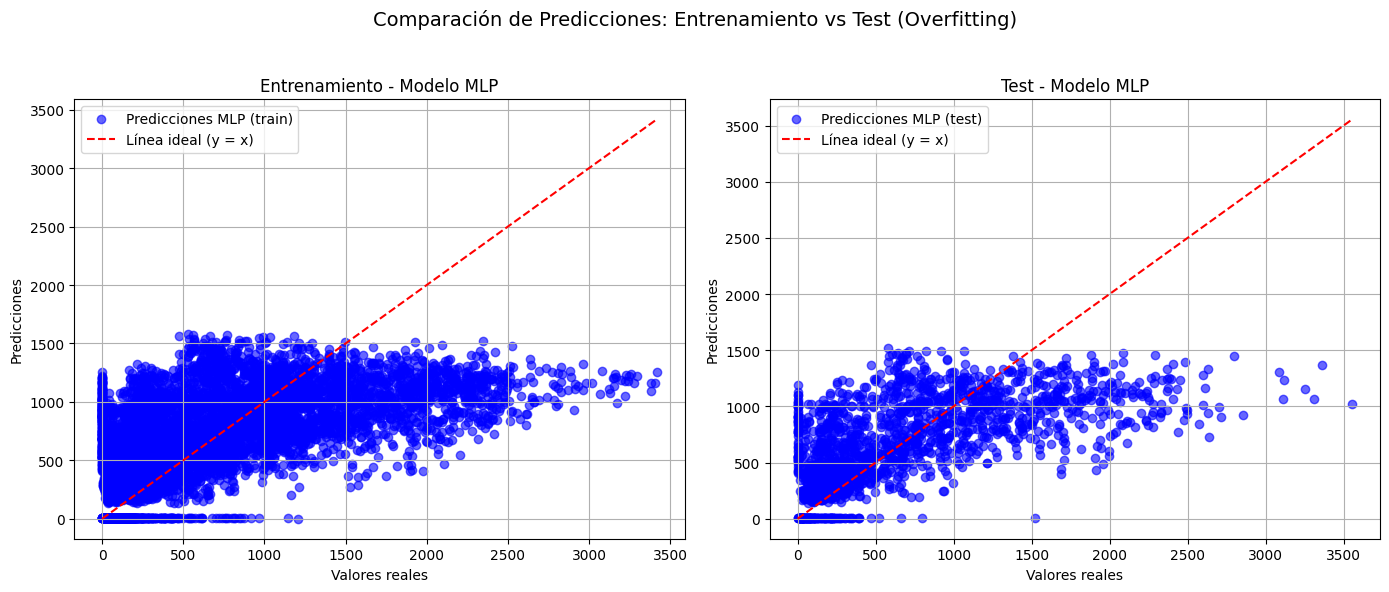

In [ ]:

#Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Subplot 1: Entrenamiento
axes[0].scatter(y_train, under_y_train_pred, color='blue', alpha=0.6, label='Predicciones MLP (train)')
min_val_train = min(y_train.min(), under_y_train_pred.min()) #Variable necesaria para crear la línea roja
max_val_train = max(y_train.max(), under_y_train_pred.max()) #Variable necesaria para crear la línea roja
axes[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', label='Línea ideal (y = x)') #Línea Roja
axes[0].set_xlabel('Valores reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title('Entrenamiento - Modelo MLP')
axes[0].legend()
axes[0].grid(True)

#Subplot 2: Test
axes[1].scatter(y_test, under_y_test_pred, color='blue', alpha=0.6, label='Predicciones MLP (test)')
min_val_test = min(y_test.min(), under_y_test_pred.min())
max_val_test = max(y_test.max(), under_y_test_pred.max())
axes[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], 'r--', label='Línea ideal (y = x)')
axes[1].set_xlabel('Valores reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title('Test - Modelo MLP')
axes[1].legend()
axes[1].grid(True)

# Ajustar diseño
plt.suptitle('Comparación de Predicciones: Entrenamiento vs Test (Overfitting)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Fuente: aca se utilizó el prompt: "Crear código para graficar la relación entre valores reales y predicciones. Además agregar una linea roja determinada por la función f(x) = x. En base a esto, dupliqué las líneas de código
#para tener 2 gráficos(testeo y entrenamiento), adapté los nombres de variables correspondientes y luego utilicé el prompt: "Añadirlos a un sistema de subplots"


#Análisis de gráficos
La línea roja corresponde a la gráfica de una función identidad cuya expresión es f(x)=x o y = x. Como la coordenada "x" corresponde a los valores reales e "y" a las predicciones, si los puntos cayeran en la recta, significaría que la predicciones son iguales que los valores reales. Pero esto no sucede, de hecho vemos mucha dispercion y la mayoría de los puntos, por debajo de la linea roja, lo que quiere decir que subestima los valores reales (predice valores menores a los verdaderos).

Con todos los resultados obtenidos, se puede concluir de que se trata de un underfitting. Pero, ¿por qué apuntar a estructuras muy simples (cantidad de neuronas y capas), tienden al underfitting?. Una de las causas mas directas es que los modelos se inicializan con valores "aleatorios", lo cual es coherente suponer que dificilmente se acerquen a valores reales. Esto también fue un punto de partida para establecer los hiperparámetros.

#Overfitting
Para el sobreajuste, la idea es construir a un modelo de mayor complejidad. Una forma de desaprovechar la capacidad de reducción de los modelos para crear representaciones cada vez mas significativas es utilizar el mismo número de neuronas para cada capa. Las redes neuronales necesitan la mayor cantidad de neuronas en las primeras capas para capturar la mayor cantidad de caracteristicas posible, pero a medida que se desarrolla el entrenamiento, la idea es obtener representaciones más reducidas pero significativas.

El problema de este enfoque, es que el entrenamiento tarda mucho más, y capaz se necesite una cantidad de capas relativamente alta (para este trabajo) lo cual seria una limitante.


Se van a utilizar 8 capas con la siguiente estructura: (1024,512,256,128,64,32,16,8)

In [ ]:
#Modelo con 7 capas con distintas cantidades de neuronas
model_over, over_train_error, over_test_error,over_y_test_pred,over_y_train_pred = build_and_evaluate_mlp(
        X_train, X_test, y_train, y_test,
        hidden_layers = (1028,512,128,64,32,16,8),
        verbose=True,
        learning_rate=0.001

    )

Iteration 1, loss = 210033.46883677
Iteration 2, loss = 131663.18267715
Iteration 3, loss = 126279.57499167
Iteration 4, loss = 126718.24079501
Iteration 5, loss = 125179.70043925
Iteration 6, loss = 124202.81848605
Iteration 7, loss = 123368.01088880
Iteration 8, loss = 123378.98982253
Iteration 9, loss = 121817.99839566
Iteration 10, loss = 120931.82957191
Iteration 11, loss = 120094.90467121
Iteration 12, loss = 118195.90057269
Iteration 13, loss = 118145.78888280
Iteration 14, loss = 115606.07345424
Iteration 15, loss = 115901.84907370
Iteration 16, loss = 113442.12052272
Iteration 17, loss = 112879.44567219
Iteration 18, loss = 113221.02632172
Iteration 19, loss = 113586.70064979
Iteration 20, loss = 112060.38447478
Iteration 21, loss = 112092.24863549
Iteration 22, loss = 112022.24649585
Iteration 23, loss = 111401.09197941
Iteration 24, loss = 110291.17767189
Iteration 25, loss = 110745.03536734
Iteration 26, loss = 110485.19261893
Iteration 27, loss = 111104.57483238
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Entrenamiento:
   MSE  = 215883.7237
   RMSE = 464.6329
   MAE  = 314.2247
   MAPE = 10279746266454667264.00%
   R²   = 0.4808

📊 Resultados para Test:
   MSE  = 222413.7438
   RMSE = 471.6076
   MAE  = 316.5062
   MAPE = 9398899889285224448.00%
   R²   = 0.4662


Partimos del hecho de que es un modelo más complejo y tenemos verificar si sobreajusta. Los coeficientes de determinación son más altos, por lo cual el porcentaje con el que explican la variabilidad es mayor. Esto tiene sentido ya que hay mas neuronas y capas para entrenar y aprender. Sin embargo, la diferencia es ligeramente menor (0.0146), por lo que tiene una mejor generalización

Los MSE son mucho menores, por lo que podemos ver que el aprendizaje es mejor. Pero para hablar de overfitting tenemos que  ver valores bajos para el MSE basado en el conjunto de entrenamiento y valores altos de los MSE del conjunto de testeo. Esto significaría que el modelo aprende tanto de los datos de entrenamiento que cualquier dato nuevo no es aprendido correctamente. Esto podría traducirse, además, en una diferencia grande entre ambos MSE. Sin embargo, esto no sucede con tanta claridad en este modelo por lo que nos queda averiguar si existe una tendencia al sobreajuste o un principio del mismo.

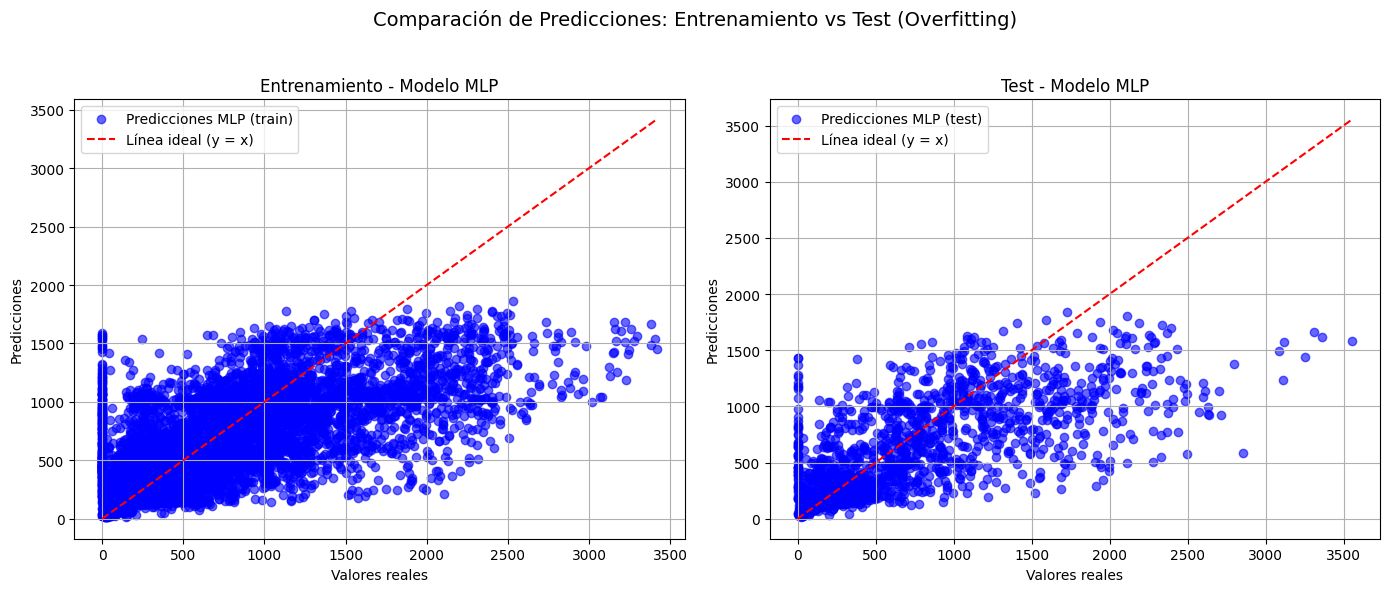

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_train, over_y_train_pred, color='blue', alpha=0.6, label='Predicciones MLP (train)')
min_val_train = min(y_train.min(), over_y_train_pred.min())
max_val_train = max(y_train.max(), over_y_train_pred.max())
axes[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', label='Línea ideal (y = x)')
axes[0].set_xlabel('Valores reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title('Entrenamiento - Modelo MLP')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(y_test, over_y_test_pred, color='blue', alpha=0.6, label='Predicciones MLP (test)')
min_val_test = min(y_test.min(), over_y_test_pred.min())
max_val_test = max(y_test.max(), over_y_test_pred.max())
axes[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], 'r--', label='Línea ideal (y = x)')
axes[1].set_xlabel('Valores reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title('Test - Modelo MLP')
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Comparación de Predicciones: Entrenamiento vs Test (Overfitting)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Análisis de los gráficos
Vemos que los valores se acercan más a la recta ideal. Esto coincide con el R cuadrado más alto. Pero sigue sin quedar en claro si sobreajusta o no. Entonces puede pasar 2 cosas:

*   El modelo no explica del todo bien la variabilidad por lo que  para empezar a ver un sobreajuste se requiere modelos aún más complejos
*   Puede que haya un ligero principio de overfitting.

Por lo que vamos a suponer el segundo caso y vamos a hacer un análisis progresivo de distintos modelos que van desde el más simple que subajustaba (y analizamos previamente) hasta este.



In [ ]:
#Configuraciones progresivas
configurations = [(8,),
                  (16,8),
                  (32,16,8),
                  (64,32,16,8),
                  (128,64,32,16,8),
                  (512,128,64,32,16,8),
                  (1028,512,128,64,32,16,8)]

alpha_value = 0.001


In [ ]:
#Para almacenar los errores
train_errors = []
test_errors = []

#Entrenamiento con distintos hiperparámetros
for hlayers in configurations:
    model, train_error, test_error, _, _ = build_and_evaluate_mlp(
        X_train, X_test, y_train, y_test,
        hidden_layers=hlayers,
        verbose=True,
        learning_rate=0.001
    )
    print(f"Arquitectura: {hlayers}")
    print(f"Train MSE: {train_error['MSE']:.4f} | Test MSE: {test_error['MSE']:.4f}")



    #Almacenamiento de resultados
    train_errors.append(train_error["MSE"])
    test_errors.append(test_error["MSE"])

    print(f"  - Error de entrenamiento (MSE): {train_error['MSE']:.4f}")
    print(f"  - Error de prueba (MSE): {test_error['MSE']:.4f}\n")

#Fuente: la implementación es una versión adaptada a la función creada anteriormente, de la propuesta en la documentación de clase (neural-networks-introduction.ipynb)


Iteration 1, loss = 456776.17191907
Iteration 2, loss = 456072.39193964
Iteration 3, loss = 454976.10560544
Iteration 4, loss = 452309.02804458
Iteration 5, loss = 447303.11668681
Iteration 6, loss = 440000.63987325
Iteration 7, loss = 431310.23695228
Iteration 8, loss = 421577.64947558
Iteration 9, loss = 410998.93003288
Iteration 10, loss = 399654.29794372
Iteration 11, loss = 387095.77093680
Iteration 12, loss = 372295.21652006
Iteration 13, loss = 356684.68256957
Iteration 14, loss = 340988.66724833
Iteration 15, loss = 325434.27689863
Iteration 16, loss = 310195.75377682
Iteration 17, loss = 295381.30442924
Iteration 18, loss = 281143.81018707
Iteration 19, loss = 267602.63953061
Iteration 20, loss = 254822.18147126
Iteration 21, loss = 242845.50288881
Iteration 22, loss = 231725.07311883
Iteration 23, loss = 221495.99733455
Iteration 24, loss = 212175.37745506
Iteration 25, loss = 203773.36070207
Iteration 26, loss = 196272.90364396
Iteration 27, loss = 189632.07125141
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 437238.04124640
Iteration 3, loss = 380523.75034503
Iteration 4, loss = 275470.65396996
Iteration 5, loss = 184593.60525076
Iteration 6, loss = 154274.50227573
Iteration 7, loss = 148042.76944733
Iteration 8, loss = 144393.56430068
Iteration 9, loss = 141694.81343351
Iteration 10, loss = 139537.66975210
Iteration 11, loss = 137705.53318577
Iteration 12, loss = 136117.49601228
Iteration 13, loss = 134645.08487785
Iteration 14, loss = 133516.78514940
Iteration 15, loss = 132464.46374884
Iteration 16, loss = 131534.87629444
Iteration 17, loss = 130705.71523697
Iteration 18, loss = 130003.04475293
Iteration 19, loss = 129364.93058217
Iteration 20, loss = 128787.89222096
Iteration 21, loss = 128263.95735533
Iteration 22, loss = 127779.16901167
Iteration 23, loss = 127409.95862800
Iteration 24, loss = 127064.46019152
Iteration 25, loss = 126736.48041761
Iteration 26, loss = 126435.55216650
Iteration 27, loss = 126151.52685164
Iteration 28, loss = 125919.10822958
Iteration

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 439639.58677409
Iteration 2, loss = 222639.94347333
Iteration 3, loss = 147491.10581838
Iteration 4, loss = 141829.84354811
Iteration 5, loss = 137702.23630814
Iteration 6, loss = 134588.37497702
Iteration 7, loss = 132023.06618572
Iteration 8, loss = 130278.07594171
Iteration 9, loss = 128955.79223096
Iteration 10, loss = 127825.62325149
Iteration 11, loss = 126965.01258944
Iteration 12, loss = 126401.30081856
Iteration 13, loss = 125836.06314667
Iteration 14, loss = 125561.69912519
Iteration 15, loss = 125246.32136387
Iteration 16, loss = 124994.91245481
Iteration 17, loss = 124821.62643858
Iteration 18, loss = 124735.94490614
Iteration 19, loss = 124571.38175206
Iteration 20, loss = 124359.27704804
Iteration 21, loss = 124495.56065838
Iteration 22, loss = 124302.97786485
Iteration 23, loss = 124240.58773228
Iteration 24, loss = 123896.55978451
Iteration 25, loss = 124089.53169039
Iteration 26, loss = 124072.41663997
Iteration 27, loss = 123848.54727034
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 144188.89113978
Iteration 3, loss = 135241.06024756
Iteration 4, loss = 129794.76843282
Iteration 5, loss = 126566.08115082
Iteration 6, loss = 125012.53983779
Iteration 7, loss = 124004.51813436
Iteration 8, loss = 123586.06415916
Iteration 9, loss = 123370.60458364
Iteration 10, loss = 122755.64810602
Iteration 11, loss = 122303.38783545
Iteration 12, loss = 121904.50278873
Iteration 13, loss = 121827.47908713
Iteration 14, loss = 121650.64036197
Iteration 15, loss = 121159.12654492
Iteration 16, loss = 120786.61162985
Iteration 17, loss = 120655.41134086
Iteration 18, loss = 120484.46962108
Iteration 19, loss = 120259.13421839
Iteration 20, loss = 120054.64830741
Iteration 21, loss = 119754.27144437
Iteration 22, loss = 119532.64819615
Iteration 23, loss = 119389.63690721
Iteration 24, loss = 119404.57674014
Iteration 25, loss = 118999.21690588
Iteration 26, loss = 118871.95808402
Iteration 27, loss = 118857.18928993
Iteration 28, loss = 118171.99026137
Iteration

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 268596.48652889
Iteration 2, loss = 132961.96457336
Iteration 3, loss = 126173.28368633
Iteration 4, loss = 125053.20369590
Iteration 5, loss = 123998.31010026
Iteration 6, loss = 123797.30580459
Iteration 7, loss = 123684.50406519
Iteration 8, loss = 122126.63587334
Iteration 9, loss = 122216.50929959
Iteration 10, loss = 122112.07282944
Iteration 11, loss = 121096.02381736
Iteration 12, loss = 121100.67600689
Iteration 13, loss = 120811.59566821
Iteration 14, loss = 120462.18527571
Iteration 15, loss = 120238.36916357
Iteration 16, loss = 119053.61901396
Iteration 17, loss = 119243.83025303
Iteration 18, loss = 118624.17083997
Iteration 19, loss = 117259.13518968
Iteration 20, loss = 116864.78089511
Iteration 21, loss = 116115.70048526
Iteration 22, loss = 115555.14309465
Iteration 23, loss = 114385.05141307
Iteration 24, loss = 114745.66849842
Iteration 25, loss = 113630.71581833
Iteration 26, loss = 114111.22235913
Iteration 27, loss = 113365.02009831
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Entrenamiento:
   MSE  = 216769.5616
   RMSE = 465.5852
   MAE  = 318.2290
   MAPE = 11004955984091820032.00%
   R²   = 0.4787

📊 Resultados para Test:
   MSE  = 220576.1401
   RMSE = 469.6553
   MAE  = 318.1233
   MAPE = 10048299088780603392.00%
   R²   = 0.4706
Arquitectura: (512, 128, 64, 32, 16, 8)
Train MSE: 216769.5616 | Test MSE: 220576.1401
  - Error de entrenamiento (MSE): 216769.5616
  - Error de prueba (MSE): 220576.1401

Iteration 1, loss = 210033.46883677
Iteration 2, loss = 131663.18267715
Iteration 3, loss = 126279.57499167
Iteration 4, loss = 126718.24079501
Iteration 5, loss = 125179.70043925
Iteration 6, loss = 124202.81848605
Iteration 7, loss = 123368.01088880
Iteration 8, loss = 123378.98982253
Iteration 9, loss = 121817.99839566
Iteration 10, loss = 120931.82957191
Iteration 11, loss = 120094.90467121
Iteration 12, loss = 118195.90057269
Iteration 13, loss = 118145.78888280
Iteration 14, loss = 115606.07345424
Iteration 15, loss = 115901.8490737

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Entrenamiento:
   MSE  = 215883.7237
   RMSE = 464.6329
   MAE  = 314.2247
   MAPE = 10279746266454667264.00%
   R²   = 0.4808

📊 Resultados para Test:
   MSE  = 222413.7438
   RMSE = 471.6076
   MAE  = 316.5062
   MAPE = 9398899889285224448.00%
   R²   = 0.4662
Arquitectura: (1028, 512, 128, 64, 32, 16, 8)
Train MSE: 215883.7237 | Test MSE: 222413.7438
  - Error de entrenamiento (MSE): 215883.7237
  - Error de prueba (MSE): 222413.7438



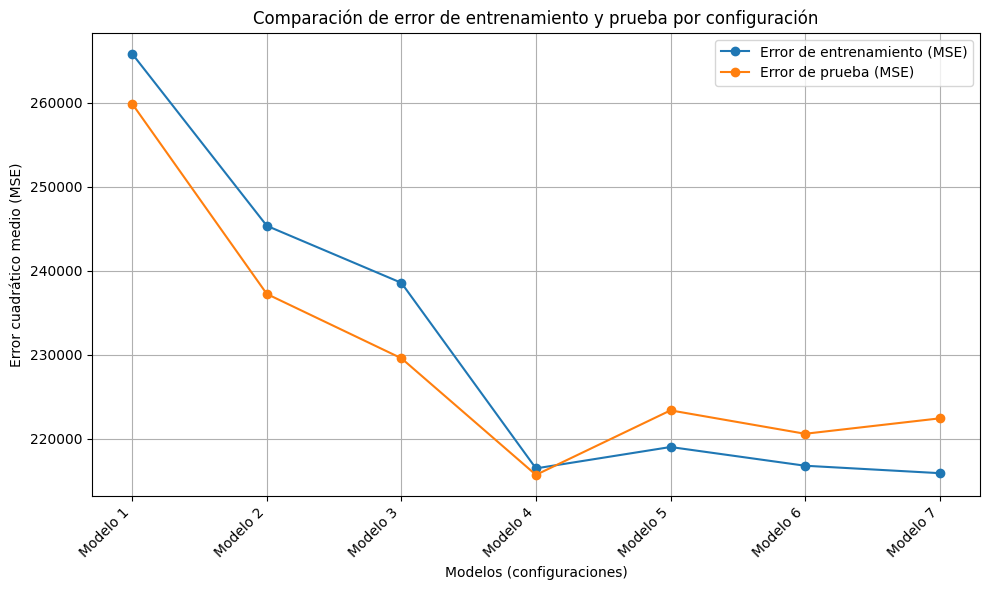

In [ ]:
# Etiquetas (una por cada modelo)
labels = [f"Modelo {i+1}" for i in range(len(train_errors))]
# Convertir a arrays para graficar
x = np.arange(len(labels))
train_vals = np.array(train_errors)
test_vals = np.array(test_errors)

plt.figure(figsize=(10, 6))
plt.plot(x, train_vals, label='Error de entrenamiento (MSE)', marker='o')
plt.plot(x, test_vals, label='Error de prueba (MSE)', marker='o')

plt.xticks(x, labels, rotation=45, ha='right')
plt.xlabel("Modelos (configuraciones)")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Comparación de error de entrenamiento y prueba por configuración")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#Fuente: se utilizó el prompt: "Código para graficar los errores almacenados en una mísma visualización"

El modelo 7 coincide con el caso propuesto de sobreajuste y al ver como se comportan los distintos modelos podemos ver una tendencia al sobreajuste, donde el MSE basado en el conjunto de entrenamiento decrece y el que está basado en el conjunto de testeo, crece. Puede que el modelo cambie para configuraciones más complejas, pero con lo visto hasta ahora, y entendiendo la tendencia cuando un modelo se complejiza, podemos establecer de que este es un caso de overfitting (ligero)

#Caso aceptable
No sería incoherente suponer de que si en ambos #extremos" suceden estos malos ajustes, posicionarnos en la configuración del medio pueda significar un caso aceptable.
La gráfica anterior respalda esta hipótesis, ya que ambos MSE alcanzan valores relativamente bajos respecto a los otros modelos, no existe tanta diferencia entre ambos MSE y por lo tanto, podrían generalizar correctamente.

In [ ]:
#Modelo con 4 capas y distintas cantidades de neuronas
model_aceptable, aceptable_train_error, aceptable_test_error,aceptable_y_test_pred,aceptable_y_train_pred = build_and_evaluate_mlp(
        X_train, X_test, y_train, y_test,
        hidden_layers = (64,32,16,8),
        verbose=True,
        learning_rate=0.001

    )

Iteration 1, loss = 342271.73644188
Iteration 2, loss = 144188.89113978
Iteration 3, loss = 135241.06024756
Iteration 4, loss = 129794.76843282
Iteration 5, loss = 126566.08115082
Iteration 6, loss = 125012.53983779
Iteration 7, loss = 124004.51813436
Iteration 8, loss = 123586.06415916
Iteration 9, loss = 123370.60458364
Iteration 10, loss = 122755.64810602
Iteration 11, loss = 122303.38783545
Iteration 12, loss = 121904.50278873
Iteration 13, loss = 121827.47908713
Iteration 14, loss = 121650.64036197
Iteration 15, loss = 121159.12654492
Iteration 16, loss = 120786.61162985
Iteration 17, loss = 120655.41134086
Iteration 18, loss = 120484.46962108
Iteration 19, loss = 120259.13421839
Iteration 20, loss = 120054.64830741
Iteration 21, loss = 119754.27144437
Iteration 22, loss = 119532.64819615
Iteration 23, loss = 119389.63690721
Iteration 24, loss = 119404.57674014
Iteration 25, loss = 118999.21690588
Iteration 26, loss = 118871.95808402
Iteration 27, loss = 118857.18928993
Iteration 

Como se puede ver:


*   La diferencia entre coeficientes de determinación es muy baja (0.0029)

*   Los MSE son relativamente bajos
*   La diferencia entre MSE es relativamente baja (772.5769)


*   Los r cuadrado son incluso más altos que los del caso de sobreajuste

 Por lo tanto, el modelo generaliza mejor y explica un mayor porcentaje de variabilidad que el resto de casos (inclusive que el de regresión lineal)

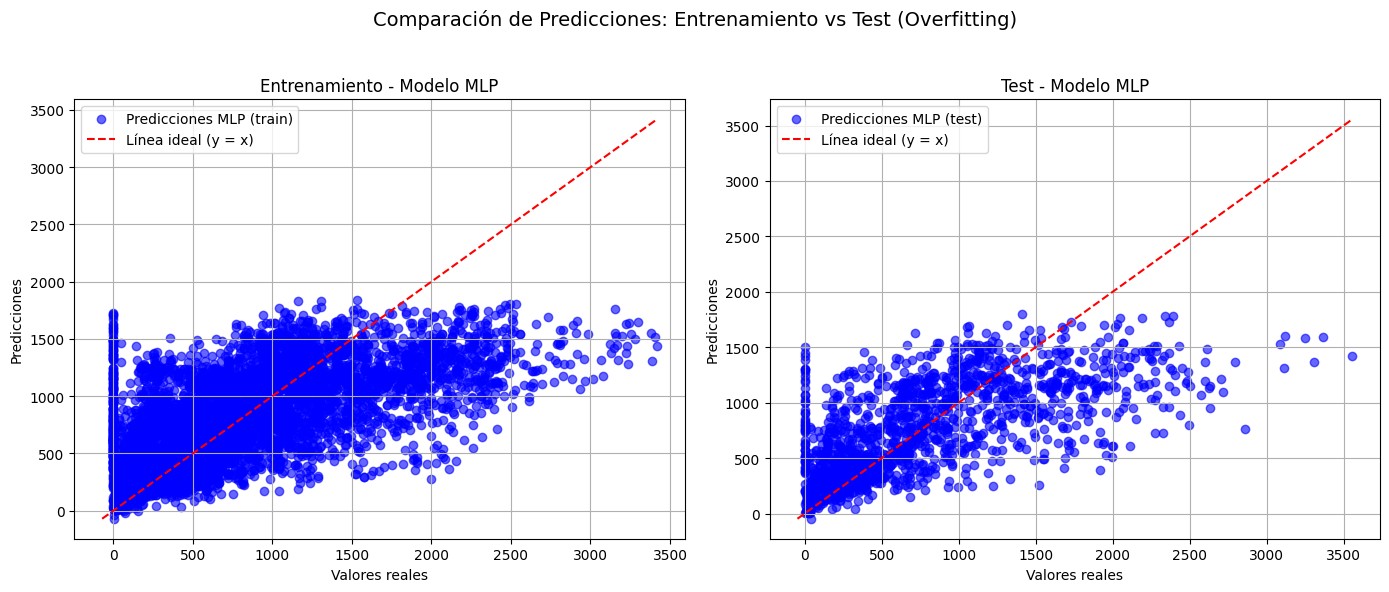

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_train, aceptable_y_train_pred, color='blue', alpha=0.6, label='Predicciones MLP (train)')
min_val_train = min(y_train.min(), aceptable_y_train_pred.min())
max_val_train = max(y_train.max(), aceptable_y_train_pred.max())
axes[0].plot([min_val_train, max_val_train], [min_val_train, max_val_train], 'r--', label='Línea ideal (y = x)')
axes[0].set_xlabel('Valores reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title('Entrenamiento - Modelo MLP')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(y_test, aceptable_y_test_pred, color='blue', alpha=0.6, label='Predicciones MLP (test)')
min_val_test = min(y_test.min(), aceptable_y_test_pred.min())
max_val_test = max(y_test.max(), aceptable_y_test_pred.max())
axes[1].plot([min_val_test, max_val_test], [min_val_test, max_val_test], 'r--', label='Línea ideal (y = x)')
axes[1].set_xlabel('Valores reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title('Test - Modelo MLP')
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Comparación de Predicciones: Entrenamiento vs Test (Overfitting)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Análisis de los gráficos
Vemos que el caso de ajuste aceptable mejoró por sobre el resto, pero vemos que todavía estamos muy lejos de tener un modelo que explique la variabilidad aceptablemente.

#Conclusión Final
A lo largo de ambos TPs pude recorrer varios modelos (uno de regresión lineal y varios MLP) Hubo una mejoría notable durante el proceso de ambas instancias evaluativas, pero los resultados siguen sin ser satisfactorios para el dataset elegido. Esto puede tener que ver con que el dataset tiene features dificiles de capturar correctamente con regresión lineal y modelos mlp simples. Se podría crear una estructura de red neuronal mucho más compleja y analizar otros resultados, pero implica muchos más recursos (tiempo, por ejemplo). Este problema es esperable dada la dispersión de los datos al analizar las relaciones de cada feature con el target.
Sería interesante poder aplicar otro tipos de modelos. De hecho, en la misma página del dataset, una persona hizo un proyecto pero con un modelo de tipo XG Boost: https://github.com/minjiontheroad/seoul-bike-demand/blob/main/demand_analysis_seoulbike.ipynb

Obteniendo gráficas como estas:

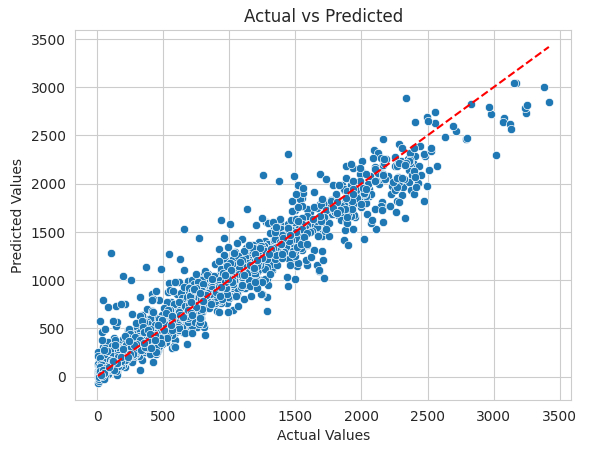



